In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
covid_19 = pd.read_csv('../../datasets/covid_19_data.csv')


In [3]:
covid_19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [4]:
# There are 306429 rows and 8 colums which is also a good Dataset to Explore insights 
#we dont need SNo. lets drop it first

In [5]:
covid_19.drop('SNo', axis=1, inplace=True)


* Overall analysis and looking at Data first

In [6]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228329 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Last Update      306429 non-null  object 
 4   Confirmed        306429 non-null  float64
 5   Deaths           306429 non-null  float64
 6   Recovered        306429 non-null  float64
dtypes: float64(3), object(4)
memory usage: 16.4+ MB


In [7]:
# here we saw that more then half colums are catagorical

* Checking Missing / Null Values

In [8]:
covid_19.isnull().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [9]:
# This Data Set Province/state contains  missing or nan values

In [10]:
covid_19.isnull()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
306424,False,False,False,False,False,False,False
306425,False,False,False,False,False,False,False
306426,False,False,False,False,False,False,False
306427,False,False,False,False,False,False,False


In [11]:
# now we see it in bool form

### In EDA things we have to do are:
+ 1 Find missing values and treat them
+ 2 Explore about numerical variables
+ 3 Explore about catagorical variables
+ 4 Finding Relationship between Features

In [12]:
#we can either drop the colum or we can either use .dropna method to drop all the Null values or missing 
# from data set

In [13]:
covid_19.dropna(axis= 0, inplace=True)

In [14]:
# we have dropped the all null values and now lets check

In [15]:
covid_19

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [16]:
#The  values are dropped

+ Statistic of The Dataset

In [17]:
covid_19.describe()

,Confirmed,Deaths,Recovered
count,2.283290e+05,228329.000000,2.283290e+05
mean,8.021276e+04,1961.347503,4.184290e+04
std,2.493646e+05,5871.902776,1.793659e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.224000e+03,15.000000,0.000000e+00
50%,1.175600e+04,234.000000,1.211000e+03
75%,4.840900e+04,1411.000000,1.660200e+04
max,5.713215e+06,112385.000000,6.399531e+06


In [18]:
# by describe it will show only integer features colums no text or catagorical

<AxesSubplot:>

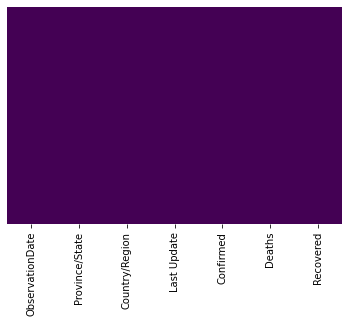

In [19]:
sns.heatmap(covid_19.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
#Heatmap is mostly very good in watching null values as it do not have any 
#so it is not visiable

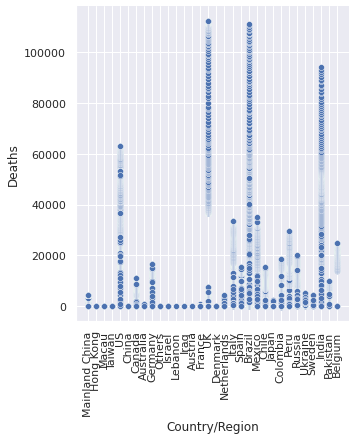

In [21]:
sns.set(rc={"figure.figsize":(30, 10)})
sns.relplot(
    data=covid_19,
    x='Country/Region',
    y='Deaths'
)
plt.xticks(rotation=90)
plt.show()

In [22]:
print(covid_19['Country/Region'].max())


Ukraine


In [23]:
i = covid_19['Country/Region'].max()


In [24]:
print(i)

Ukraine


In [25]:
print(covid_19.max(numeric_only=True))


Confirmed    5713215.0
Deaths        112385.0
Recovered    6399531.0
dtype: float64


In [26]:
print(covid_19.max(numeric_only=True).max())


6399531.0


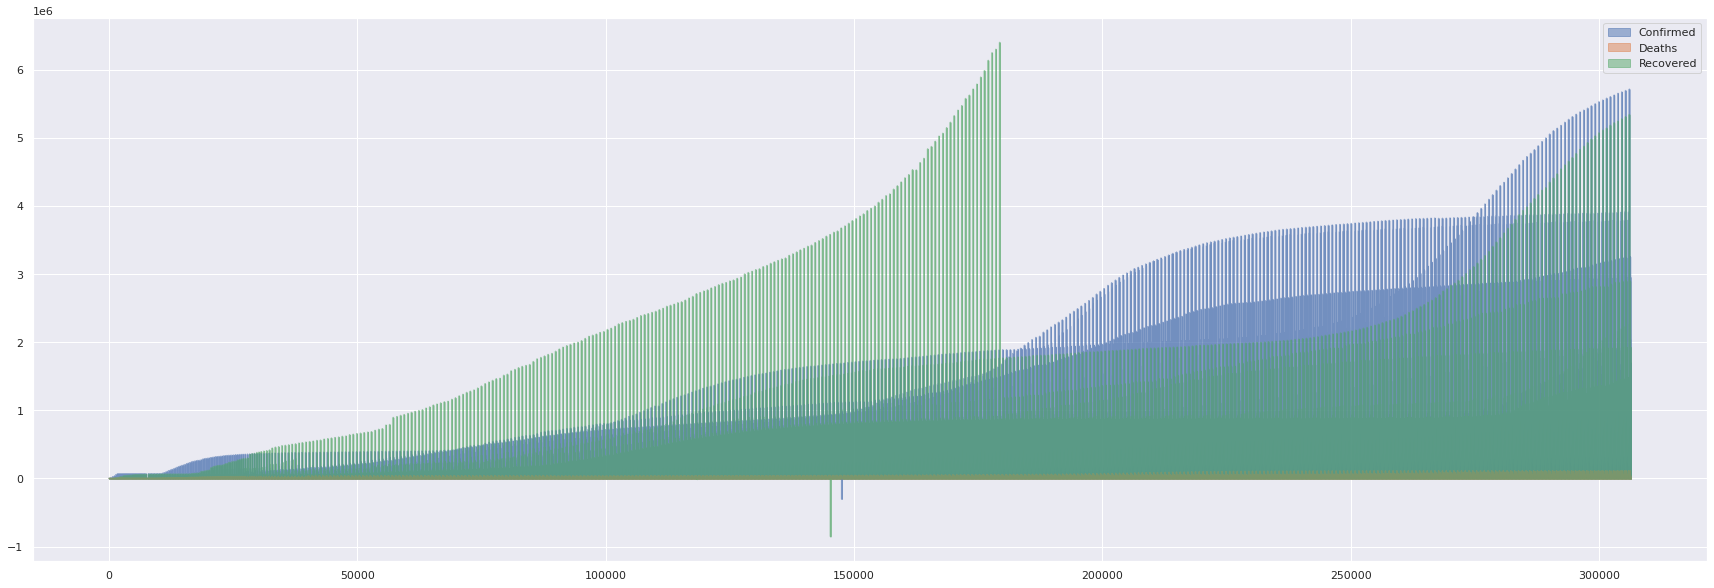

In [27]:
ax = covid_19.plot.area(stacked=False)


In [28]:
covid_19.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [29]:
covid_19.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [30]:
covid_19.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [31]:
covid_19.rename(columns = {'Province/State':'Province', 'Country/Region':'Country'}, inplace = True)

In [32]:
covid_19.head()

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [33]:
covid_19.Country.value_counts(ascending= False)

Russia            30129
US                26740
Japan             17932
Mainland China    15758
India             13050
Colombia          12419
Mexico            12199
Brazil            10144
Ukraine            9801
Peru               9542
Italy              8001
Spain              7615
Sweden             7539
Canada             6960
UK                 6553
Germany            6481
Chile              6375
Netherlands        5864
France             4544
Australia          3785
Pakistan           2478
Belgium            2388
Denmark             893
Hong Kong           494
Macau               494
Taiwan               49
China                48
Others               46
Israel                5
Austria               1
Iraq                  1
Lebanon               1
Name: Country, dtype: int64

In [34]:
# we saw that Russia is the top country where covid cases are showed
#while Austria,Iraq and Lebanon is the countries where the cases are just 1

In [35]:
country_names=covid_19.Country.value_counts().index

In [36]:
country_values=covid_19.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fd168cb84f0>,
 [Text(0.9077721068693732, 0.6212485830888788, 'Russia'),
  Text(-0.17760080621187313, 1.08556803270587, 'US'),
  Text(-0.9552645397988597, 0.5454077914761328, 'Japan'),
  Text(-1.0872664103192045, -0.1668884447515503, 'Mainland China'),
  Text(-0.8225118136939842, -0.730393261424168, 'India'),
  Text(-0.36405289168628335, -1.0380103525759536, 'Colombia'),
  Text(0.16771140200144483, -1.0871397728161314, 'Mexico'),
  Text(0.6194028958910812, -0.9090324815768371, 'Brazil'),
  Text(0.9228863324431144, -0.5985656333182666, 'Ukraine'),
  Text(1.0801896164392375, -0.20782298365881768, 'Peru')])

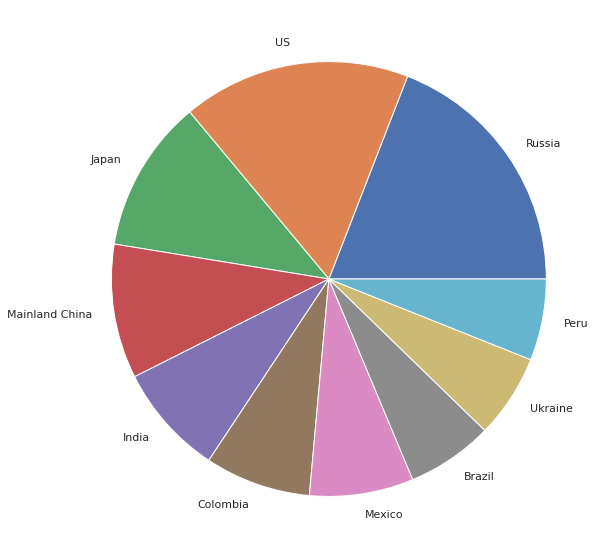

In [37]:
#Pie chart
plt.pie(country_values[ :10],labels=country_names[ :10])

In [38]:
#lets check in percentage use autopercentage parametre

([<matplotlib.patches.Wedge at 0x7fd168c8d100>,
 [Text(0.9077721068693732, 0.6212485830888788, 'Russia'),
  Text(-0.17760080621187313, 1.08556803270587, 'US'),
  Text(-0.9552645397988597, 0.5454077914761328, 'Japan'),
  Text(-1.0872664103192045, -0.1668884447515503, 'Mainland China'),
  Text(-0.8225118136939842, -0.730393261424168, 'India'),
  Text(-0.36405289168628335, -1.0380103525759536, 'Colombia'),
  Text(0.16771140200144483, -1.0871397728161314, 'Mexico'),
  Text(0.6194028958910812, -0.9090324815768371, 'Brazil'),
  Text(0.9228863324431144, -0.5985656333182666, 'Ukraine'),
  Text(1.0801896164392375, -0.20782298365881768, 'Peru')],
 [Text(0.4951484219287489, 0.33886286350302475, "'19.10%'"),
  Text(-0.09687316702465806, 0.5921280178395654, "'16.95%'"),
  Text(-0.5210533853448326, 0.29749515898698153, "'11.37%'"),
  Text(-0.593054405628657, -0.09103006077357287, "'9.99%'"),
  Text(-0.44864280746944585, -0.3983963244131825, "'8.27%'"),
  Text(-0.19857430455615452, -0.566187465041429

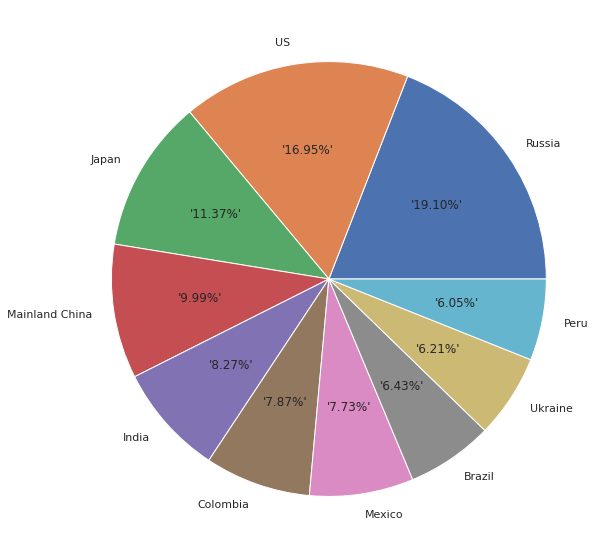

In [39]:
plt.pie(country_values[ :10],labels=country_names[ :10],autopct="'%1.2f%%'")

+ Observation= The most covid_19 records are from russia 19.10%
+ Then 16.95% from US and 11.37% from Japan

In [40]:
covid_19.columns

Index(['ObservationDate', 'Province', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [41]:
cases_observed=covid_19.groupby(['ObservationDate','Country']).size().reset_index()

In [42]:
covid_19.columns

Index(['ObservationDate', 'Province', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [43]:
cases_observed=covid_19.groupby(['Country','ObservationDate','Confirmed','Deaths','Recovered']).size().reset_index().rename(columns={0:'cases'})

In [44]:
cases_observed.head(9)

,Country,ObservationDate,Confirmed,Deaths,Recovered,cases
0,Australia,01/01/2021,75.0,0.0,71.0,1
1,Australia,01/01/2021,118.0,3.0,114.0,1
2,Australia,01/01/2021,234.0,13.0,221.0,1
3,Australia,01/01/2021,580.0,4.0,566.0,1
4,Australia,01/01/2021,863.0,9.0,838.0,1
5,Australia,01/01/2021,1255.0,6.0,1224.0,1
6,Australia,01/01/2021,4947.0,54.0,0.0,1
7,Australia,01/01/2021,20388.0,820.0,19539.0,1
8,Australia,01/02/2021,81.0,0.0,71.0,1


In [45]:
cases_observed.tail(28)

,Country,ObservationDate,Confirmed,Deaths,Recovered,cases
226942,Ukraine,12/30/2020,110139.0,1897.0,38856.0,1
226943,Ukraine,12/31/2020,6763.0,239.0,6365.0,1
226944,Ukraine,12/31/2020,8448.0,253.0,4191.0,1
226945,Ukraine,12/31/2020,10508.0,293.0,7519.0,1
226946,Ukraine,12/31/2020,17752.0,431.0,9273.0,1
226947,Ukraine,12/31/2020,22500.0,395.0,15237.0,1
226948,Ukraine,12/31/2020,25187.0,509.0,20253.0,1
226949,Ukraine,12/31/2020,28200.0,637.0,23526.0,1
226950,Ukraine,12/31/2020,29897.0,442.0,16908.0,1
226951,Ukraine,12/31/2020,30900.0,508.0,14208.0,1


In [54]:
covid_19.head()

,ObservationDate,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [68]:
covid_19["Province"]

0                     Anhui
1                   Beijing
2                 Chongqing
3                    Fujian
4                     Gansu
                ...        
306424    Zaporizhia Oblast
306425              Zeeland
306426             Zhejiang
306427      Zhytomyr Oblast
306428         Zuid-Holland
Name: Province, Length: 228329, dtype: object

In [70]:
covid_19["Province"].tail(10)

306419                 Yukon
306420                Yunnan
306421      Zabaykalsky Krai
306422             Zacatecas
306423    Zakarpattia Oblast
306424     Zaporizhia Oblast
306425               Zeeland
306426              Zhejiang
306427       Zhytomyr Oblast
306428          Zuid-Holland
Name: Province, dtype: object

In [71]:
covid_19["Province"].max()

'Zuid-Holland'